In [2]:
from datetime import date 
from datetime import timedelta 
from datetime import datetime
import numpy as np
import pandas as pd
from pandas_ods_reader import read_ods
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from matplotlib import style
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable
style.use('ggplot')  
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=20,12

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [46]:
url = 'https://www.mohfw.gov.in/'

#for getting the web content
web_content = requests.get(url).content

#parsing the html content
soup = BeautifulSoup(web_content,"html.parser")

#removing extra lines and spaces
extract_contents = lambda row: [x.text.replace('\n','') for x in row]

#finding all tables
stats = []
all_rows = soup.find_all('tr')

for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    
    if len(stat)==5:
        stats.append(stat)

#converting the data into panda dataframe

new_cols = ["Sr .No", "Name of State/UT", "Total Confirmed cases", "Recovered", "Death"]
state_data = pd.DataFrame(data = stats,columns = new_cols)

#converting datan into int
state_data['Total Confirmed cases'] = state_data['Total Confirmed cases'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)

#state_data['Death'][17] = '199' 
#original file is having #199 instade of 199 so if so use the lines as mentiosed above

state_data['Death'] = state_data['Death'].map(int)

In [53]:
#if need to remove index line the use the bellow line

#state_data.drop(['Sr .No'],axis=1,inplace=True)
total_cases = state_data['Total Confirmed cases'].sum()
print("Total cases are",total_cases)

Total cases are 31709


In [54]:
state_data['Active cases'] = state_data['Total Confirmed cases']-(state_data['Recovered']+state_data['Death'])
state_data.head()

,Name of State/UT,Total Confirmed cases,Recovered,Death,Active cases
0,Andaman and Nicobar Islands,33,15,0,18
1,Andhra Pradesh,1332,287,31,1014
2,Arunachal Pradesh,1,1,0,0
3,Assam,38,27,1,10
4,Bihar,383,64,2,317


In [55]:
state_data.style.background_gradient(cmap='Reds')

,Name of State/UT,Total Confirmed cases,Recovered,Death,Active cases
0,Andaman and Nicobar Islands,33,15,0,18
1,Andhra Pradesh,1332,287,31,1014
2,Arunachal Pradesh,1,1,0,0
3,Assam,38,27,1,10
4,Bihar,383,64,2,317
5,Chandigarh,56,17,0,39
6,Chhattisgarh,38,34,0,4
7,Delhi,3314,1078,54,2182
8,Goa,7,7,0,0
9,Gujarat,3774,434,181,3159


In [56]:
Sorted_Active_Cases = state_data.groupby('Name of State/UT')['Active cases'].sum().sort_values(ascending=False).to_frame()

In [57]:
Sorted_Active_Cases.head()

,Active cases
Name of State/UT,
Maharashtra,7530
Gujarat,3159
Delhi,2182
Madhya Pradesh#,1985
Uttar Pradesh,1602


In [58]:
Sorted_Active_Cases.style.background_gradient(cmap = 'Blues')

,Active cases
Name of State/UT,
Maharashtra,7530
Gujarat,3159
Delhi,2182
Madhya Pradesh#,1985
Uttar Pradesh,1602
Rajasthan,1545
Andhra Pradesh,1014
Tamil Nadu,865
Telengana,619


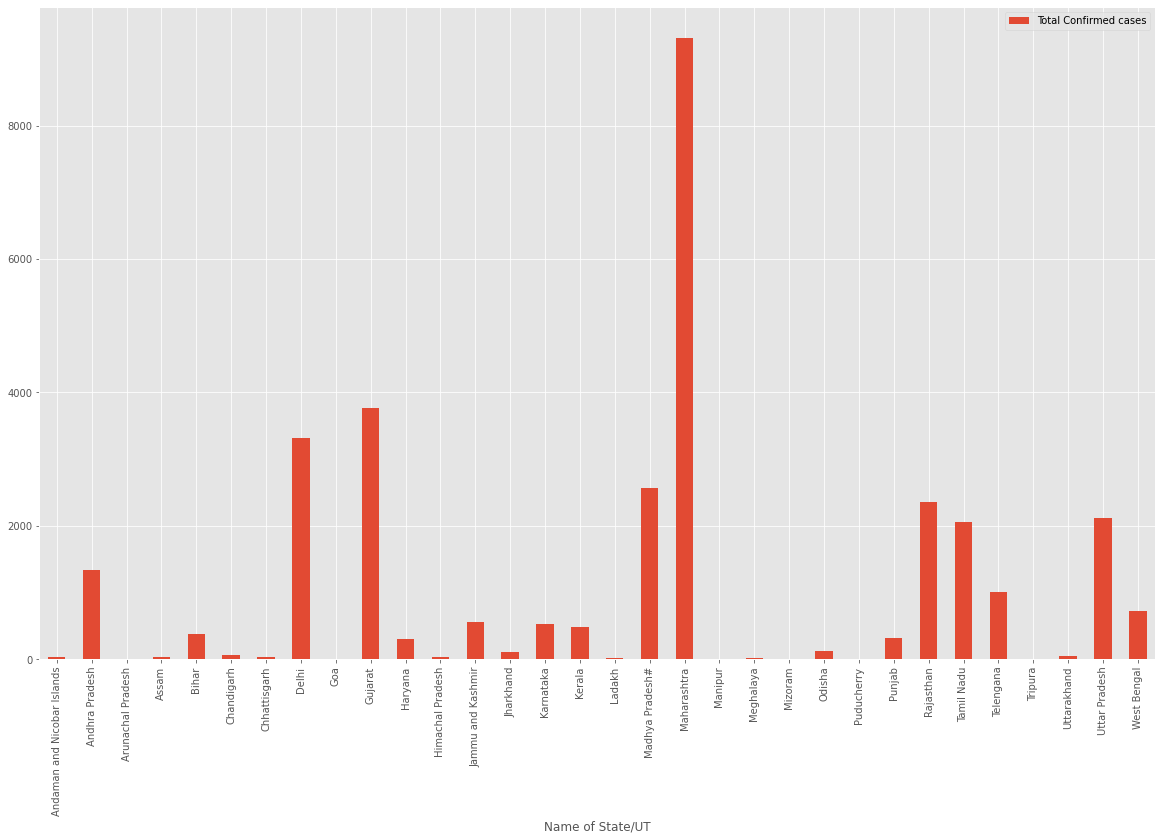

In [59]:
#Graphical Represantation

state_data.plot(kind='bar', x = 'Name of State/UT', y = 'Total Confirmed cases')
plt.show()
state_data.iplot(kind='bar', x = 'Name of State/UT', y = 'Total Confirmed cases')

px.bar(state_data, x = 'Name of State/UT', y = 'Total Confirmed cases')

In [60]:
df = pd.read_csv('/home/digant/Downloads/covid_19_data.csv')
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
 
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
rec= df.groupby('Date').sum()['Recovered'].reset_index()


In [61]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode = 'lines+markers', name = 'Confirmed',line = dict(color='green',width = 2)))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode = 'lines+markers', name = 'Deaths',line = dict(color='red',width = 2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode = 'lines+markers', name = 'Recovered',line = dict(color='blue',width = 2)))

In [63]:
df_confirmed = pd.read_csv('/home/digant/time_series_covid19_confirmed_global.csv')
df_confirmed.rename(columns={'Country/Region':'Country'},inplace = True)
df_pos = pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [64]:
fig = px.density_mapbox(df_pos,lat="Lat",lon="Long",hover_name = "Province/State",hover_data = ["Confirmed","Deaths","Recovered"],animation_frame = "Date",color_continuous_scale = "Portland",radius=9,zoom=0,height=700)
fig.update_layout(title='World Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map" , mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [65]:
df_india = pd.read_excel('/home/digant/Downloads/COVID-19-Time-Series-Forecasting-with-Data-Analysis-master/Indian Coordinates.xlsx')
df_india['Latitude'] = df_india['Latitude'].map(float)
df_india['Longitude']= df_india['Longitude'].map(float)
df_confirmed_india = pd.read_csv('/home/digant/Downloads/covid_19_india.csv')
df_confirmed_india.rename(columns={'State/UnionTerritory':'State'},inplace = True)
df_india.rename(columns={'Name of State / UT':'State'},inplace = True)
df_confirmed_india['Date'] = pd.to_datetime(df_confirmed_india['Date'], format='%d/%m/%y')
df_pos_india = pd.merge(df_india,df_confirmed_india,on=['State','State'],right_index=True).sort_values(by='Date')

In [66]:
df_pos_india['Date'] = df_pos_india['Date'].apply(lambda x: x.strftime('%d/%m/%Y'))

In [67]:
fig_india = px.density_mapbox(df_pos_india,lat="Latitude",lon="Longitude",hover_name = "State",hover_data = ["Confirmed","Deaths","Cured"],animation_frame = "Date",color_continuous_scale = "Portland",radius=20,zoom=0,height=700)
fig_india.update_layout(title='India corona virus')
fig_india.update_layout(mapbox_style="open-street-map" , mapbox_center_lon=0)
fig_india.update_layout(margin={"r":0,"t":0,"l":0,"b":0})